### 1) Introduction

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("Battery_RUL.csv")

In [15]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [19]:
data['Min. Voltage Charg. (V)']

0        3.211
1        3.220
2        3.224
3        3.225
4        3.398
         ...  
15059    3.742
15060    3.744
15061    3.742
15062    3.839
15063    3.305
Name: Min. Voltage Charg. (V), Length: 15064, dtype: float64

### 2) Data Visualization

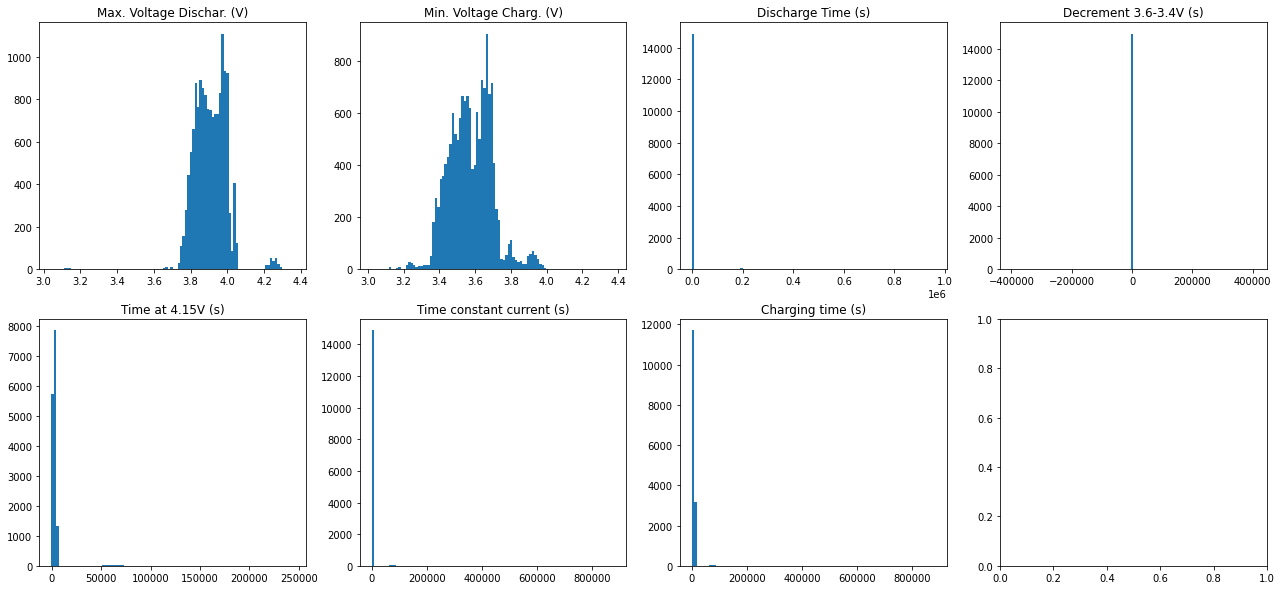

In [62]:
fig, ax = plt.subplots(2, 4, figsize=(22,10))

# 1st plot
h, bins, _ = ax[0][0].hist(data['Max. Voltage Dischar. (V)'], bins=100)
ax[0][0].set_title('Max. Voltage Dischar. (V)')

# 2nd plot
h, bins, _ = ax[0][1].hist(data['Min. Voltage Charg. (V)'], bins=100)
ax[0][1].set_title('Min. Voltage Charg. (V)')

# 3st plot
h, bins, _ = ax[0][2].hist(data['Discharge Time (s)'], bins=100)
ax[0][2].set_title('Discharge Time (s)')

# 4nd plot
h, bins, _ = ax[0][3].hist(data['Decrement 3.6-3.4V (s)'], bins=100)
ax[0][3].set_title('Decrement 3.6-3.4V (s)')

# 5nd plot
h, bins, _ = ax[1][0].hist(data['Time at 4.15V (s)'], bins=100)
ax[1][0].set_title('Time at 4.15V (s)')

# 6nd plot
h, bins, _ = ax[1][1].hist(data['Time constant current (s)'], bins=100)
ax[1][1].set_title('Time constant current (s)')

# 7nd plot
h, bins, _ = ax[1][2].hist(data['Charging time (s)'], bins=100)
ax[1][2].set_title('Charging time (s)')

plt.show()

<AxesSubplot:>

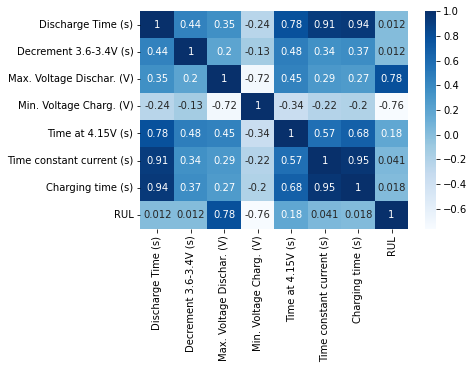

In [65]:
batery_rul = data[weather_features + ['RUL']]
corr_mat = batery_rul.corr()

sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap='Blues')

### 3) Data Preprocessing

In [66]:
x = data.drop(['RUL', "Cycle_Index"], axis = 1)
y = data["RUL"]

* Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

* StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 4) Prediction

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 4.1. Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_head_lr = lr.predict(x_test)

#### 4.2. Decision Tree

In [71]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

y_head_tree = tree.predict(x_test)

#### 4.3. Random Forrest

In [72]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_head_rf = rf.predict(x_test)

#### r2 score

In [73]:
from sklearn.metrics import r2_score

print("Linear Regression r2 score: {}".format(r2_score(y_test, y_head_lr)))
print("Decision Tree r2 score: {}".format(r2_score(y_test, y_head_tree)))
print("Random Forrest r2 score: {}".format(r2_score(y_test, y_head_rf)))

Linear Regression r2 score: 0.7880478250988074
Decision Tree r2 score: 0.9917239056271185
Random Forrest r2 score: 0.9959789117099034


### Conclusion 
* The best of them is Random Forrest. => Random Forrest r2 score: 0.9959789117099034